##### Select the CSV file that contains the data directly from the Columbus Instruments wheel cage software (unaltered) and set the file path name to "datafile"

If using this Jupyter Notebook, this cell is the only cell that needs to be altered for a new analysis

In [12]:
datafile = '/Users/brooksleitner/invivoanalysis/wheels/RunningWheelAnalysis/sepsis_wheels.csv'

Upload the csv file into the Jupyter Notebook

In [18]:
import pandas as pd

data = pd.read_csv(datafile, header=23)
data

,Int,Cage,Time,Wheel (counts),Wheel Accum (counts),Unnamed: 5
0,0,1,05/04/21 16:20:48,0,0,NaN
1,0,2,05/04/21 16:20:48,0,0,NaN
2,0,3,05/04/21 16:20:48,0,0,NaN
3,0,4,05/04/21 16:20:48,0,0,NaN
4,0,5,05/04/21 16:20:48,0,0,NaN
...,...,...,...,...,...,...
32011,4001,4,06/01/21 11:22:37,0,155843,NaN
32012,4001,5,06/01/21 11:22:37,0,488998,NaN
32013,4001,6,06/01/21 11:22:37,0,820684,NaN
32014,4001,7,06/01/21 11:22:38,0,169205,NaN


You can see the raw data is kind of messy to work with...

Import the wheels script, which contains all of the necessary processing functions

In [14]:
import wheels

Begin data cleaning

Preprocess: Taking a raw dataframe with all of the mice in individual cages, this function:

1. Creates a dictionary of dataframes with each mouse separated,  
2. Convert wheel counts into a distance in meters
3. Sums all of the counts into single day bins of data

In [19]:
processed_data = wheels.preprocess(data)

See the new output for the data in cage 3 (randomly selected)

In [21]:
processed_data[2].head(10)

,Int,Cage,Wheel (counts),Wheel Accum (counts),Unnamed: 5,Distance_meters
Time,,,,,,
2021-05-04,1035,92,7256,107299,0.0,2097.176459
2021-05-05,16920,288,13649,1613061,0.0,3944.923028
2021-05-06,37656,288,17800,3845386,0.0,5144.672130
2021-05-07,58392,288,18448,6384861,0.0,5331.961317
2021-05-08,79128,288,19417,9179352,0.0,5612.028019
2021-05-09,99864,288,21536,11999501,0.0,6224.475224
2021-05-10,120600,288,21106,15098801,0.0,6100.193818
2021-05-11,141336,288,5100,17852082,0.0,1474.035273
2021-05-12,162072,288,398,17912519,0.0,115.032557


The remove zeros function takes out rows where the distance traveled by a mouse that day is 0

In [24]:
processed_data = wheels.remove_zeros(processed_data)

The assign function will:

1. Assign a new column to each cages' dataframe with the value of the cage number originally listed
2. Assign a Day Number beginning with 0, so that the date is not the only measure of day status

In [25]:
processed_data = wheels.assign(processed_data)
processed_data[2].head(10)

,Int,Cage,Wheel (counts),Wheel Accum (counts),Unnamed: 5,Distance_meters,Mouse,Day
Time,,,,,,,,
2021-05-04,1035,92,7256,107299,0.0,2097.176459,2,0
2021-05-05,16920,288,13649,1613061,0.0,3944.923028,2,1
2021-05-06,37656,288,17800,3845386,0.0,5144.672130,2,2
2021-05-07,58392,288,18448,6384861,0.0,5331.961317,2,3
2021-05-08,79128,288,19417,9179352,0.0,5612.028019,2,4
2021-05-09,99864,288,21536,11999501,0.0,6224.475224,2,5
2021-05-10,120600,288,21106,15098801,0.0,6100.193818,2,6
2021-05-11,141336,288,5100,17852082,0.0,1474.035273,2,7
2021-05-12,162072,288,398,17912519,0.0,115.032557,2,8


The plot_summary function will plot traces for each individual mouse over the entire duration of the recording

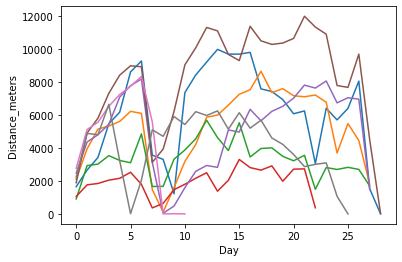

In [26]:
wheels.plot_summary(processed_data)

The metrics function will produce wideform data (easier to read) and longform data (easier to plot) with several potentially interesting data metrics:

1. Maximum meters run per day per mouse
2. Average meters run per day per mouse
3. First Week average meters run per day per mouse
4. Last Week average meters run per day per mouse

In [28]:
wide_data, long_data = wheels.metrics(processed_data)

In [29]:
wide_data

,Mouse,Max_Meters_Day,Avg_Meters_Day,First_Wk_Meters_Day,Last_Wk_Meters_Day
0,1,9983.554197,6034.724327,5324.735654,4451.792972
1,2,8658.945636,5201.579388,4922.204285,5220.892553
2,3,5685.151730,3297.895864,3086.514251,2540.997332
3,4,3305.885383,1958.380896,1885.154859,2312.005746
4,5,8183.786031,5047.621152,5733.543028,6537.573528
5,6,11994.600751,8179.291170,6609.004369,7418.856690
6,7,8335.813982,4445.858544,6187.397250,4132.047057
7,8,6651.078373,4157.702132,3410.306537,2553.095156


In [32]:
long_data.head(10)

,Mouse,measurement,meters
0,1,Max_Meters_Day,9983.554197
1,2,Max_Meters_Day,8658.945636
2,3,Max_Meters_Day,5685.151730
3,4,Max_Meters_Day,3305.885383
4,5,Max_Meters_Day,8183.786031
5,6,Max_Meters_Day,11994.600751
6,7,Max_Meters_Day,8335.813982
7,8,Max_Meters_Day,6651.078373
8,1,Avg_Meters_Day,6034.724327
9,2,Avg_Meters_Day,5201.579388


<AxesSubplot:xlabel='meters', ylabel='measurement'>

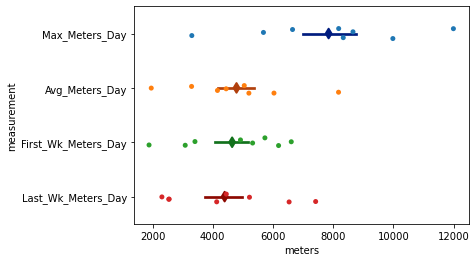

In [33]:
import seaborn as sns

sns.stripplot(x="meters", y="measurement", data=y, dodge=.8 - .8 / 3)

sns.pointplot(x="meters", y="measurement",data=y, dodge=.8 - .8 / 3,
              join=False, palette="dark", markers="d", scale=1.0, ci=68)
              